In [ ]:
from google.colab import files

upload=files.upload()



Saving WA_Fn-UseC_-Telco-Customer-Churn (2).csv to WA_Fn-UseC_-Telco-Customer-Churn (2).csv


In [20]:
import pandas as pd
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn (2).csv')

In [21]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


predict customer churn

In [22]:
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid", palette="muted", font_scale=1.1)
# df = pd.read_csv("Telco-Customer-Churn.csv") # Data is already loaded in a previous cell
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
df.info()
df.describe(include="all").T
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [24]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

/tmp/ipython-input-3678945340.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="Set2")


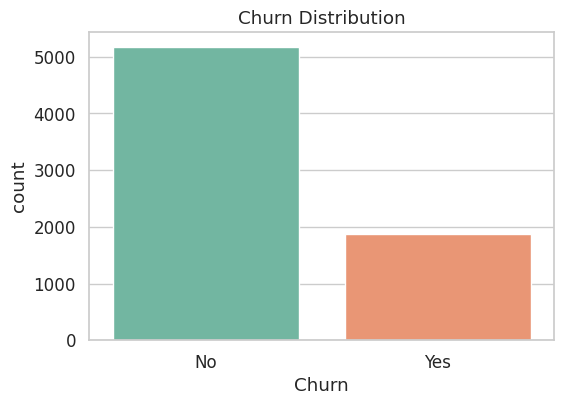

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=df, palette="Set2")
plt.title("Churn Distribution")
plt.show()
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(churn_rate)

Matplotlib is a Python library for data visualization.

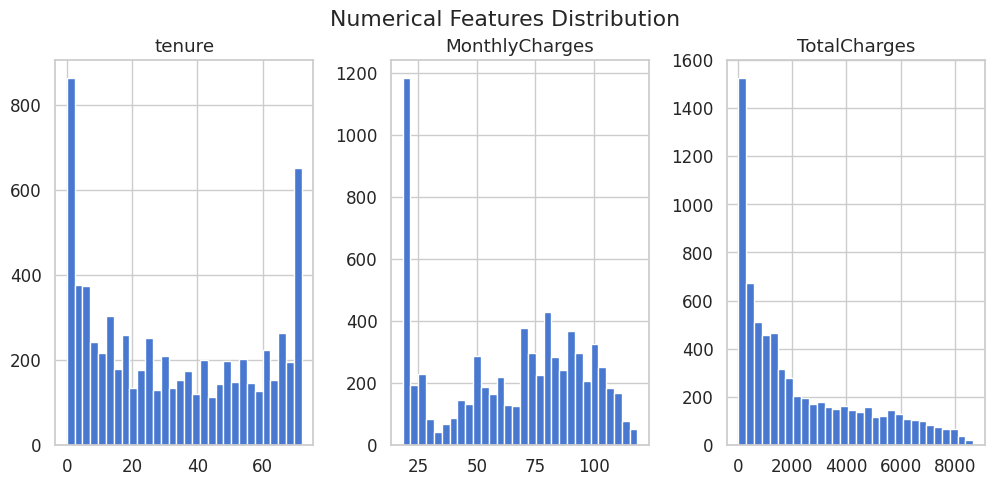

/tmp/ipython-input-2720860969.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="Set2")
/tmp/ipython-input-2720860969.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="Set2")
/tmp/ipython-input-2720860969.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="Set2")


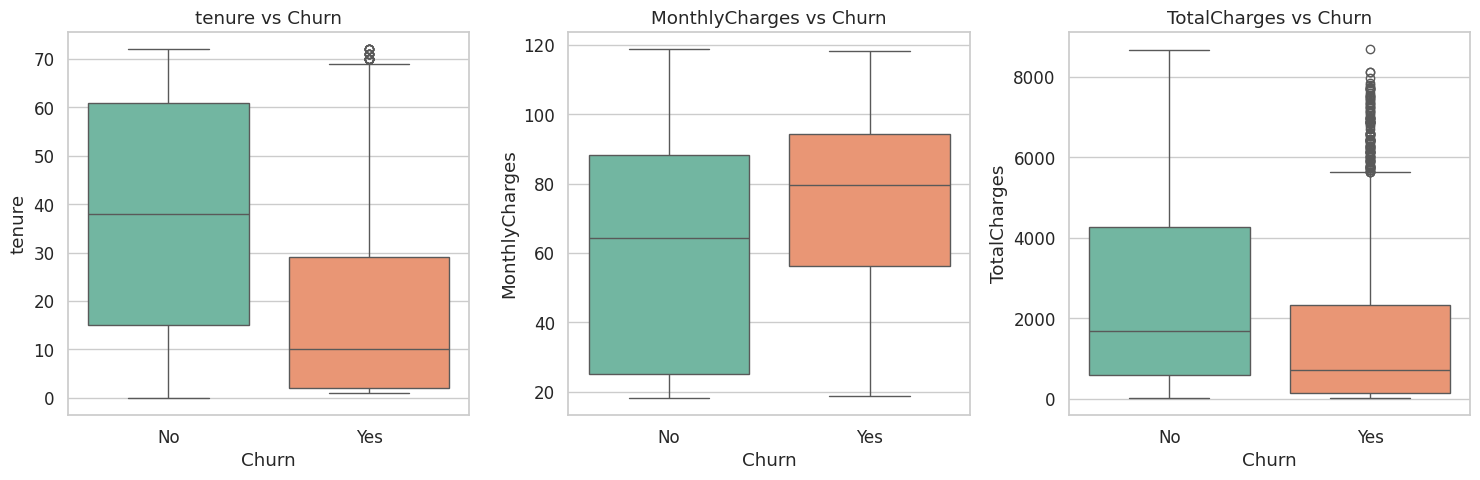

In [26]:
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
df[num_cols].hist(bins=30, figsize=(12, 5), layout=(1,3))
plt.suptitle("Numerical Features Distribution")
plt.show()
plt.figure(figsize=(15,5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1,3,i)
    sns.boxplot(x="Churn", y=col, data=df, palette="Set2")
    plt.title(f"{col} vs Churn")
plt.tight_layout()
plt.show()

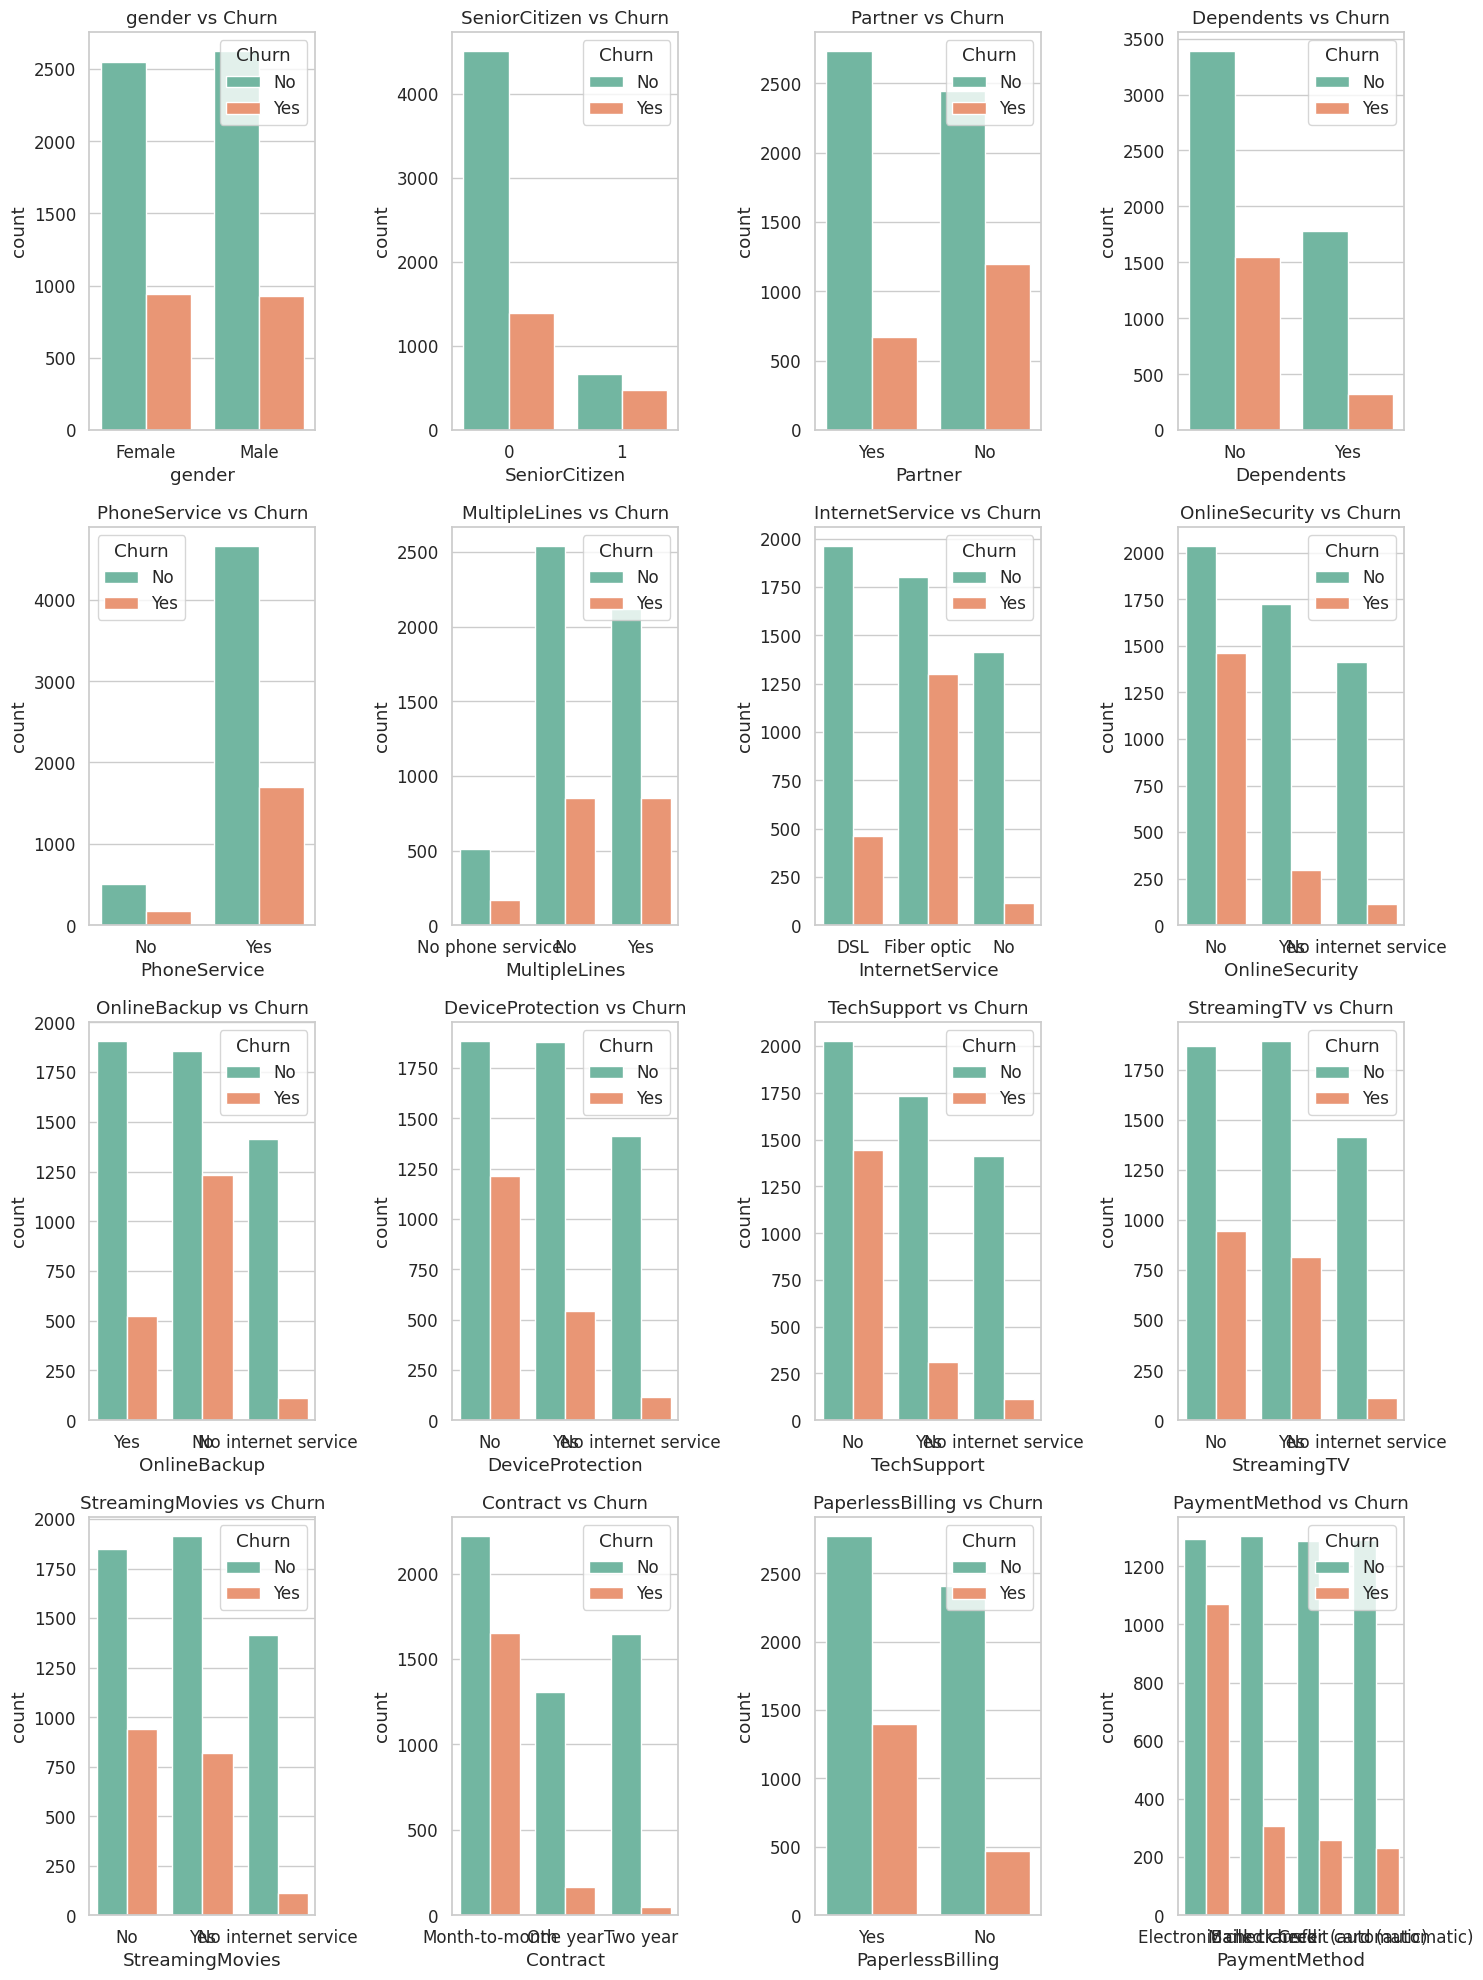

In [27]:
cat_cols = df.nunique()[df.nunique() < 10].keys().tolist()
cat_cols.remove("Churn")
plt.figure(figsize=(15, 20))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=col, hue="Churn", data=df, palette="Set2")
    plt.title(f"{col} vs Churn")
plt.tight_layout()
plt.show()

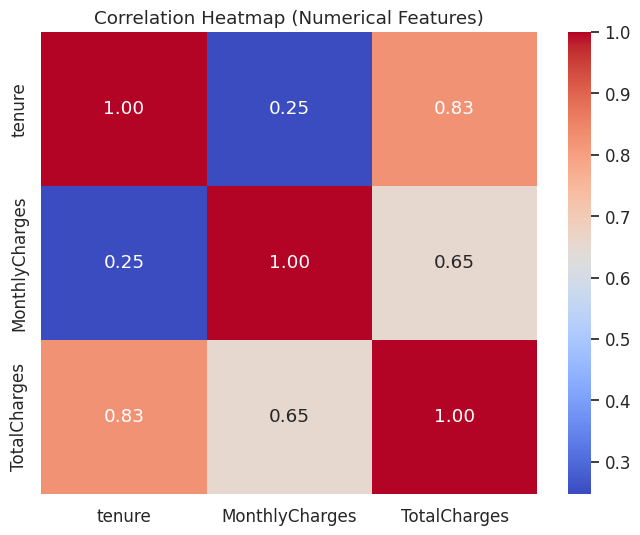

In [28]:
plt.figure(figsize=(8,6))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

A heatmap is like a color-coded matrix showing correlation values between all numerical features.

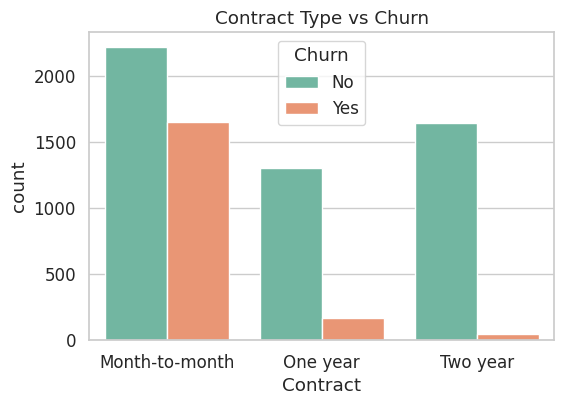

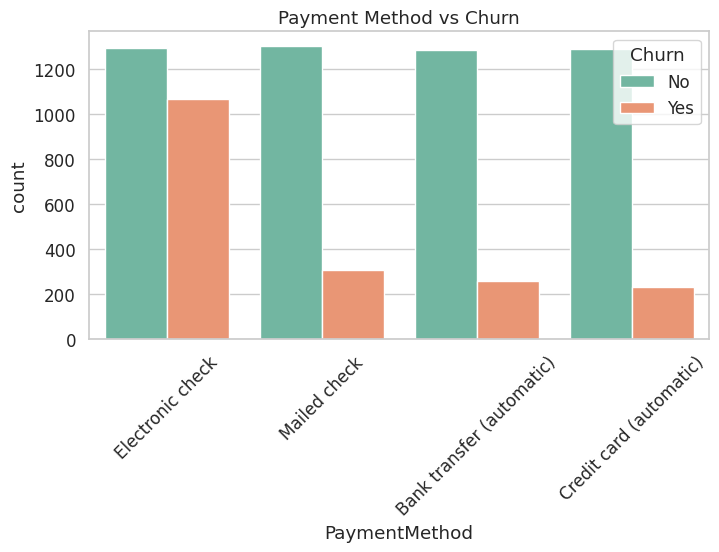

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(x="Contract", hue="Churn", data=df, palette="Set2")
plt.title("Contract Type vs Churn")
plt.show()
plt.figure(figsize=(8,4))
sns.countplot(x="PaymentMethod", hue="Churn", data=df, palette="Set2")
plt.xticks(rotation=45)
plt.title("Payment Method vs Churn")
plt.show()

In [30]:
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

Shape: (7043, 21)

Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Data Types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Missing Values:
 customerID    

In [31]:
print("\nNumerical Summary:\n", df.describe())
print("\nCategorical Summary:\n", df.describe(include="object"))



Numerical Summary:
        SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2281.916928
std         0.368612    24.559481       30.090047   2265.270398
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    402.225000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000

Categorical Summary:
         customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     3186-AJIEK   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361          3390   

    

In [32]:
unique_counts = df.nunique()
print("\nUnique values per column:\n", unique_counts)



Unique values per column:
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64



Churn distribution:
 Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


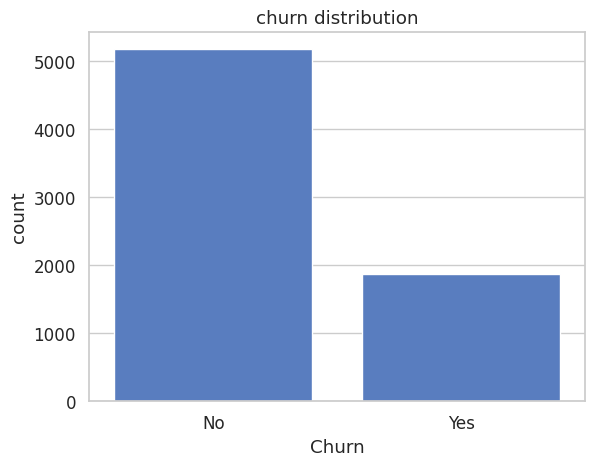

In [34]:
print("\nChurn distribution:\n", df['Churn'].value_counts(normalize=True))
sns.countplot(x="Churn", data=df)
plt.title("churn distribution")
plt.show()

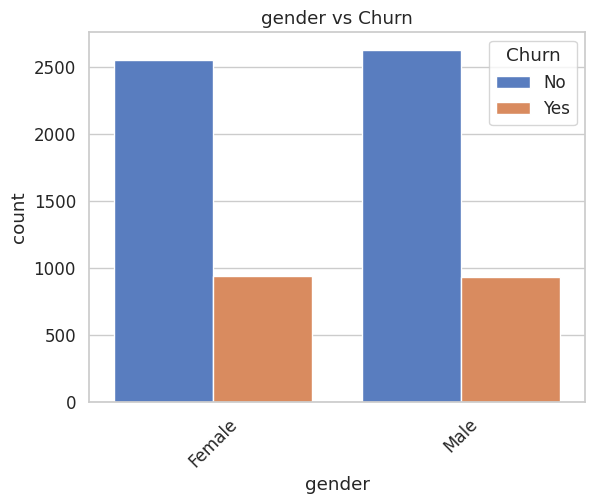

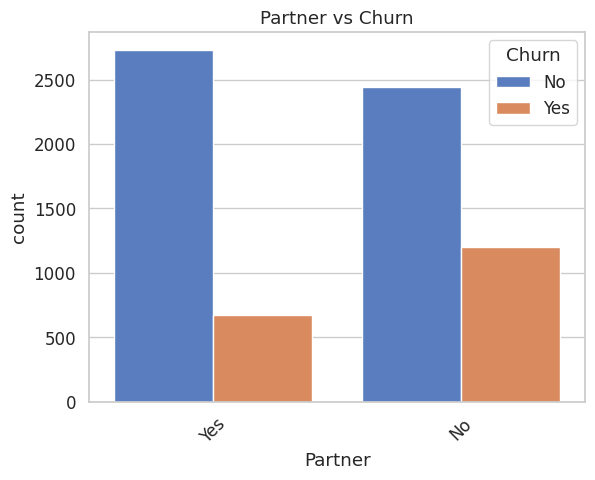

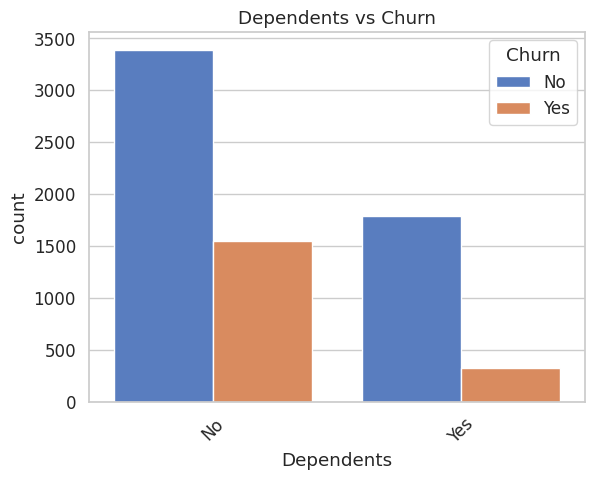

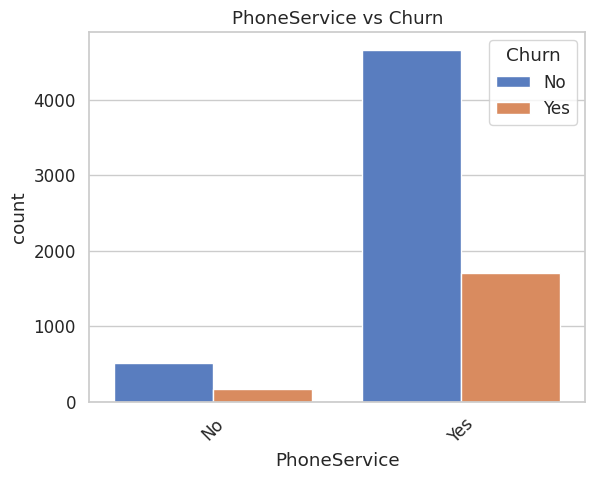

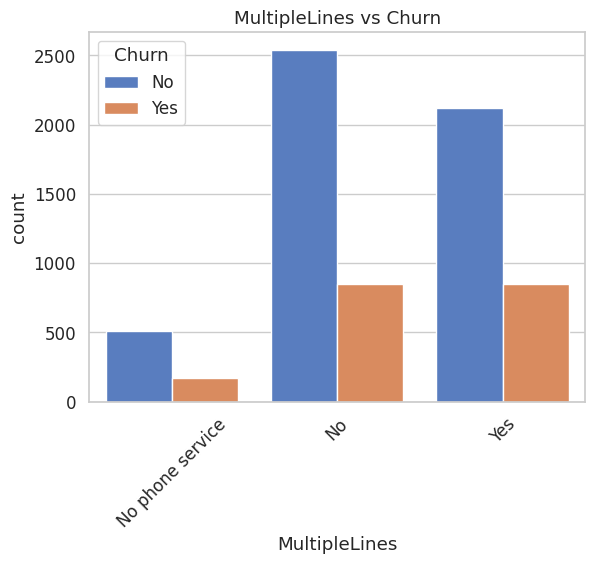

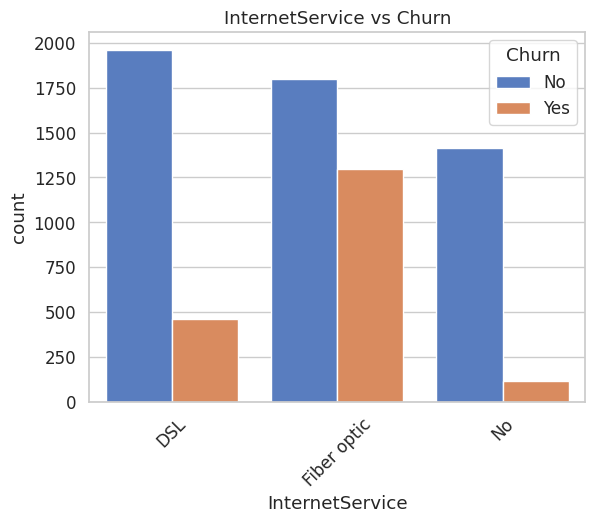

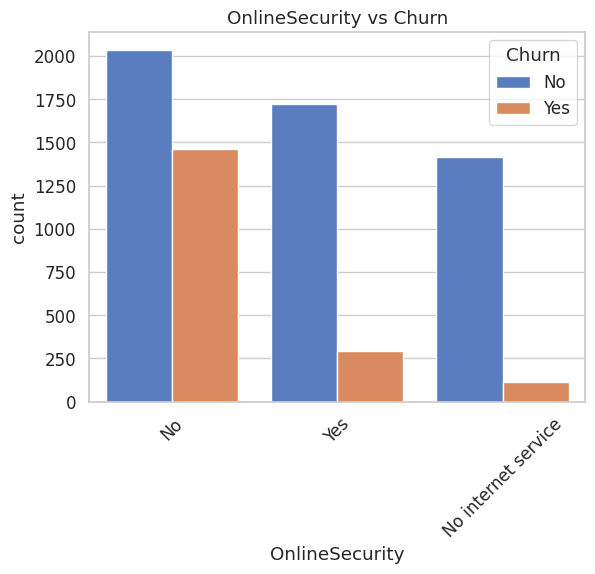

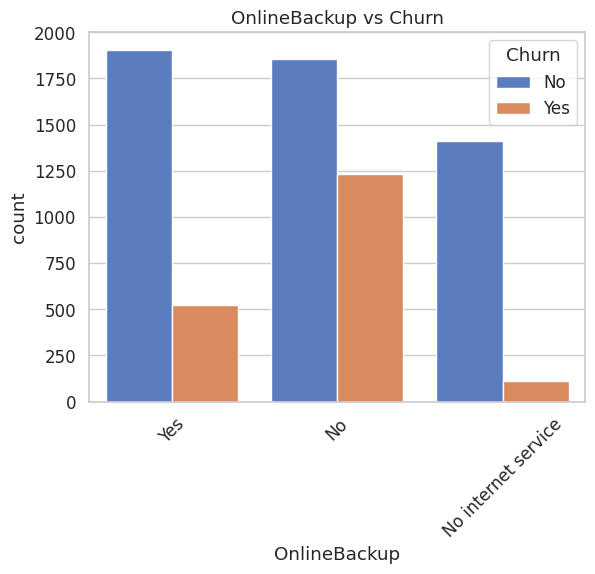

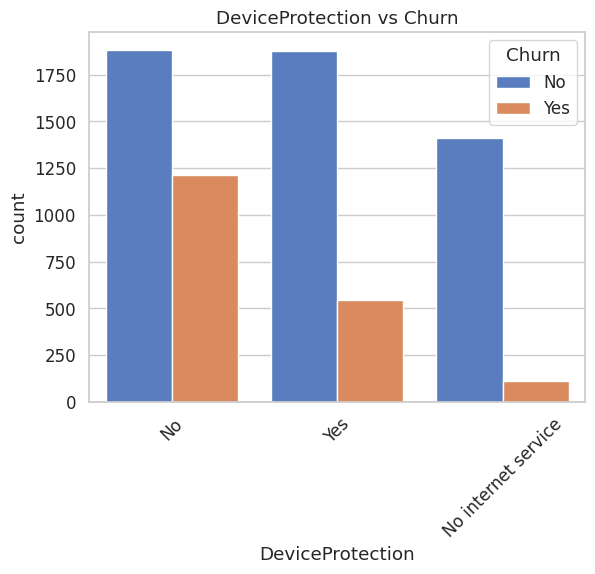

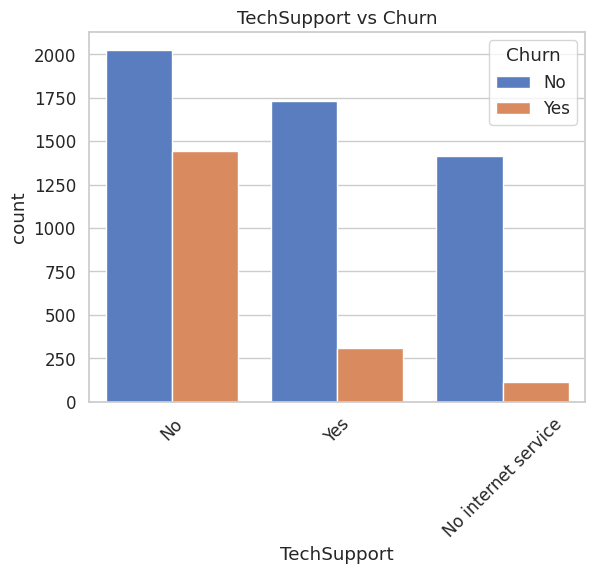

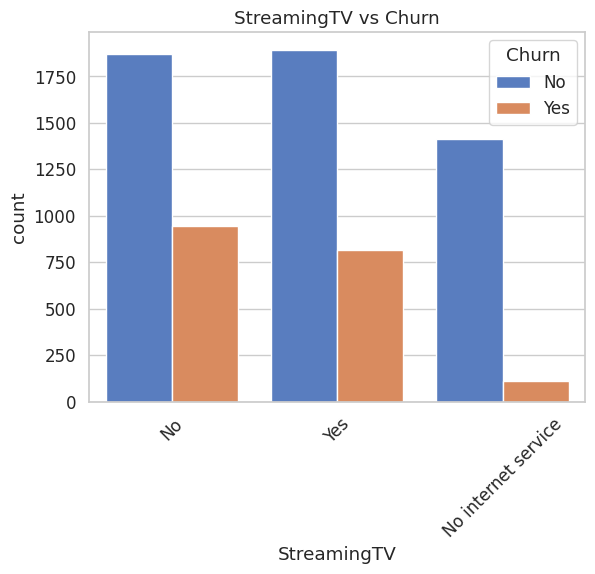

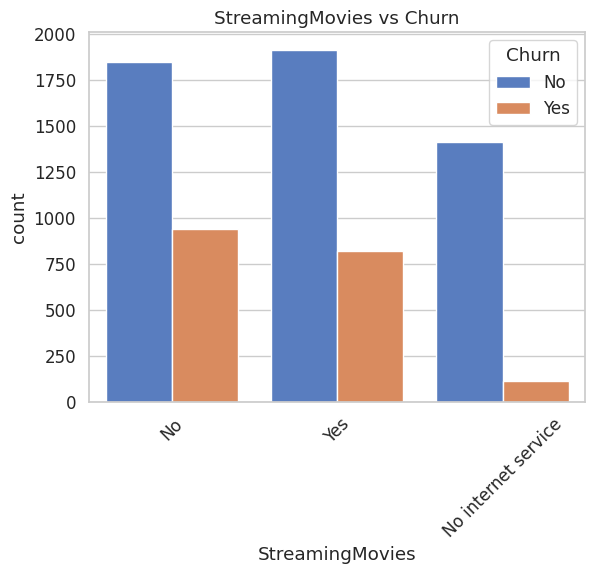

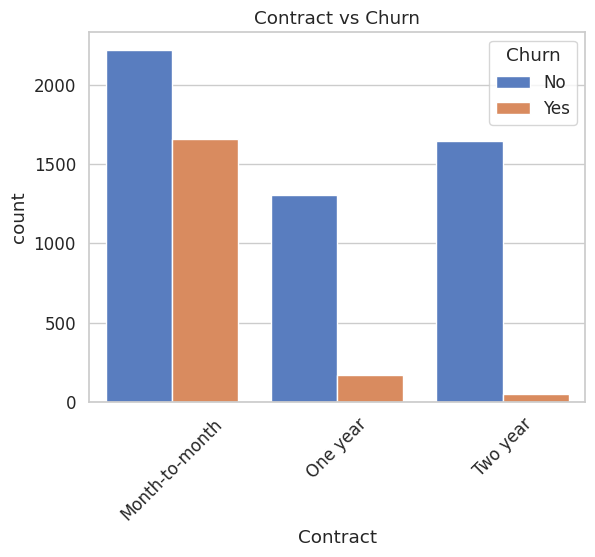

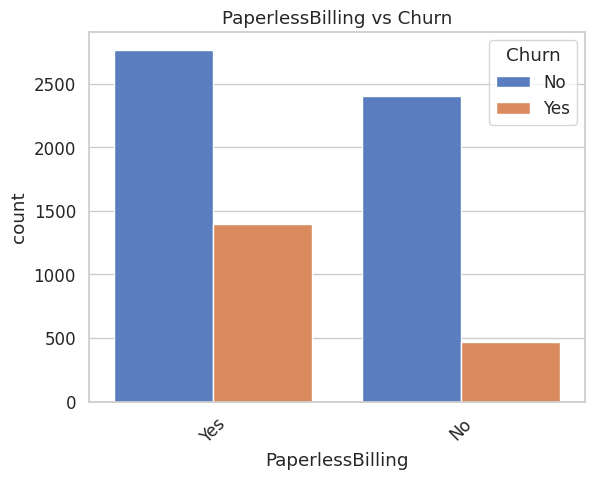

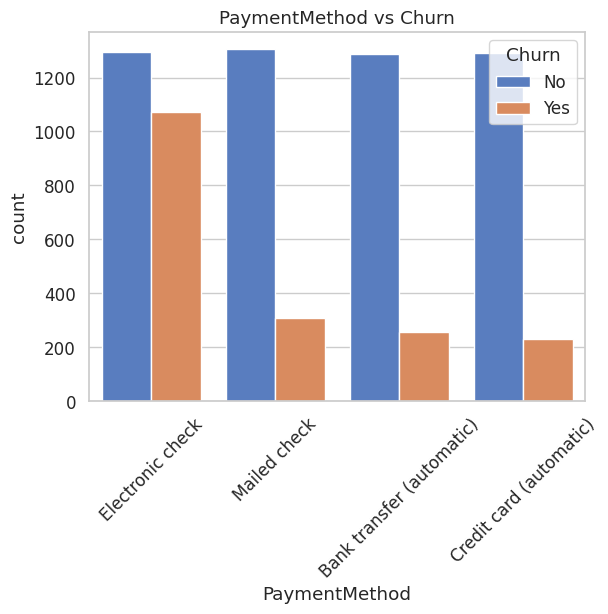

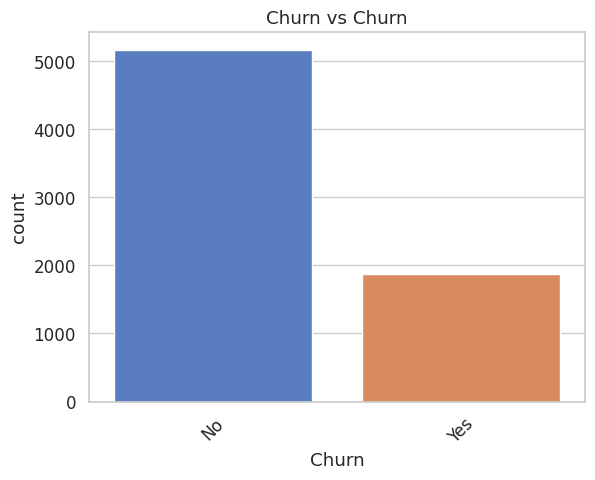

In [33]:
cat_cols = df.select_dtypes(include="object").columns.drop(["customerID"])
for col in cat_cols:   # <- remove this loop if strict no-loop is required
    sns.countplot(x=col, hue="Churn", data=df)
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.show()


In [36]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [35]:
num_cols = df.select_dtypes(include=["int64","float64"]).columns
print("\nCorrelation with Churn (encoded):")
df_corr = df.copy()
df_corr["Churn"] = df_corr["Churn"].map({"Yes":1,"No":0})
print(df_corr[num_cols].corrwith(df_corr["Churn"]))



Correlation with Churn (encoded):
SeniorCitizen     0.150889
tenure           -0.352229
MonthlyCharges    0.193356
TotalCharges     -0.199037
dtype: float64


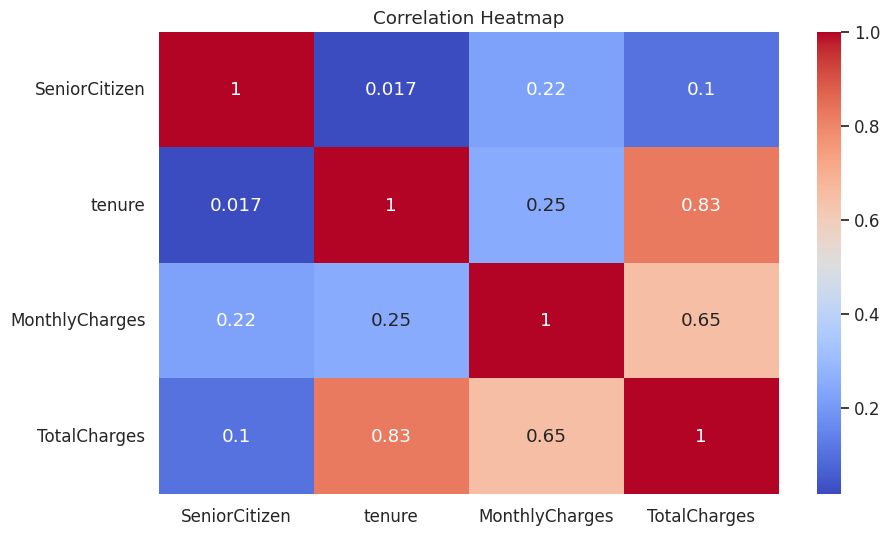

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(df_corr[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

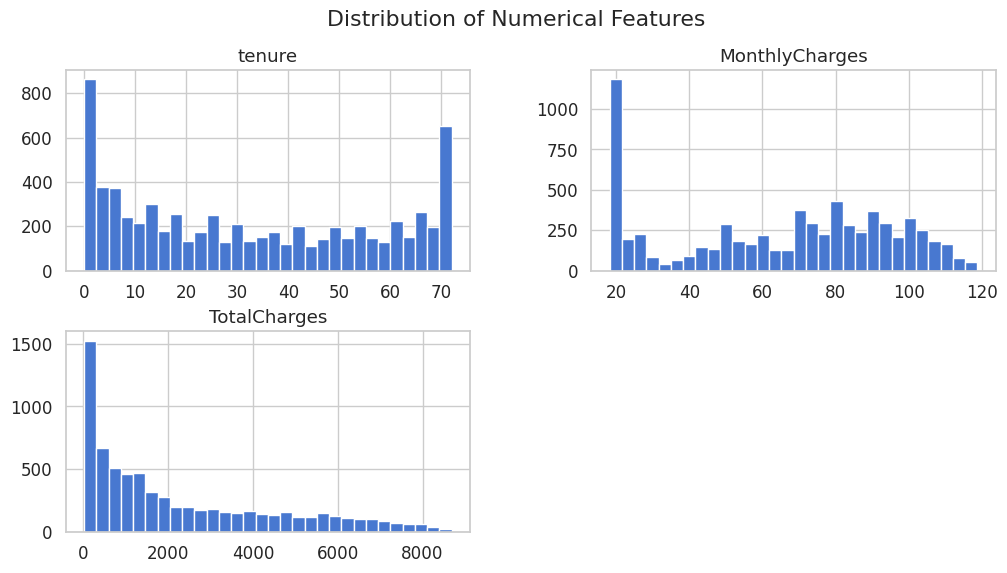

In [38]:
df[['tenure','MonthlyCharges','TotalCharges']].hist(bins=30, figsize=(12,6))
plt.suptitle("Distribution of Numerical Features")
plt.show()

In [39]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [40]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [41]:
le = LabelEncoder()
df['customerID_encoding'] = le.fit_transform(df['customerID'])

In [42]:
df['customerID_encoding'] = le.fit_transform(df['customerID'])
df['gender_encoding'] = le.fit_transform(df['gender'])
df['Partner.encoding'] = le.fit_transform(df['Partner'])
df['Dependents_encoding'] = le.fit_transform(df['Dependents'])
df['PhoneService_encoding'] = le.fit_transform(df['PhoneService'])
df['MultipleLines_encoding'] = le.fit_transform(df['MultipleLines'])
df['InternetService_encoding'] = le.fit_transform(df['InternetService'])
df['OnlineSecurity_encoding'] = le.fit_transform(df['OnlineSecurity'])
df['OnlineBackup_encoding'] = le.fit_transform(df['OnlineBackup'])
df['DeviceProtection_encoding'] = le.fit_transform(df['DeviceProtection'])
df['TechSupport_encoding'] = le.fit_transform(df['TechSupport'])
df['StreamingTV_encoding'] = le.fit_transform(df['StreamingTV'])
df['StreamingMovies_encoding'] = le.fit_transform(df['StreamingMovies'])
df['Contract_encoding'] = le.fit_transform(df['Contract'])
df['PaperlessBilling_encoding'] = le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod_encoding'] = le.fit_transform(df['PaymentMethod'])
df['TotalCharges_encoding'] = le.fit_transform(df['TotalCharges'])
df['Churn_encoding'] = le.fit_transform(df['Churn'])

In [44]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'customerID_encoding', 'gender_encoding', 'Partner.encoding',
       'Dependents_encoding', 'PhoneService_encoding',
       'MultipleLines_encoding', 'InternetService_encoding',
       'OnlineSecurity_encoding', 'OnlineBackup_encoding',
       'DeviceProtection_encoding', 'TechSupport_encoding',
       'StreamingTV_encoding', 'StreamingMovies_encoding', 'Contract_encoding',
       'PaperlessBilling_encoding', 'PaymentMethod_encoding',
       'TotalCharges_encoding', 'Churn_encoding'],
      dtype='object')

In [46]:
pf=df.drop(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],axis=1)

In [47]:
pf.head(2)

,customerID_encoding,gender_encoding,Partner.encoding,Dependents_encoding,PhoneService_encoding,MultipleLines_encoding,InternetService_encoding,OnlineSecurity_encoding,OnlineBackup_encoding,DeviceProtection_encoding,TechSupport_encoding,StreamingTV_encoding,StreamingMovies_encoding,Contract_encoding,PaperlessBilling_encoding,PaymentMethod_encoding,TotalCharges_encoding,Churn_encoding
0,5375,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,74,0
1,3962,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,3625,0


In [48]:
pf.corr()

,customerID_encoding,gender_encoding,Partner.encoding,Dependents_encoding,PhoneService_encoding,MultipleLines_encoding,InternetService_encoding,OnlineSecurity_encoding,OnlineBackup_encoding,DeviceProtection_encoding,TechSupport_encoding,StreamingTV_encoding,StreamingMovies_encoding,Contract_encoding,PaperlessBilling_encoding,PaymentMethod_encoding,TotalCharges_encoding,Churn_encoding
customerID_encoding,1.000000,0.006288,-0.026729,-0.012823,-0.006483,0.004316,-0.012407,0.013292,-0.003334,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,0.004979,-0.017447
gender_encoding,0.006288,1.000000,-0.001808,0.010517,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.000580,-0.008612
Partner.encoding,-0.026729,-0.001808,1.000000,0.452676,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.342015,-0.150448
Dependents_encoding,-0.012823,0.010517,0.452676,1.000000,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,0.081424,-0.164221
PhoneService_encoding,-0.006483,-0.006488,0.017706,-0.001762,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.085814,0.011942
MultipleLines_encoding,0.004316,-0.006739,0.142410,-0.024991,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.463209,0.038037
InternetService_encoding,-0.012407,-0.000863,0.000891,0.044590,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.209475,-0.047291
OnlineSecurity_encoding,0.013292,-0.015017,0.150828,0.152166,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,0.246816,-0.289309
OnlineBackup_encoding,-0.003334,-0.012057,0.153130,0.091015,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.352251,-0.195525
DeviceProtection_encoding,-0.006918,0.000549,0.166330,0.080537,0.003727,0.122318,0.044944,0.175985,0.187757,1.000000,0.240593,0.276652,0.288799,0.350277,-0.038234,-0.135750,0.370433,-0.178134


<Axes: >

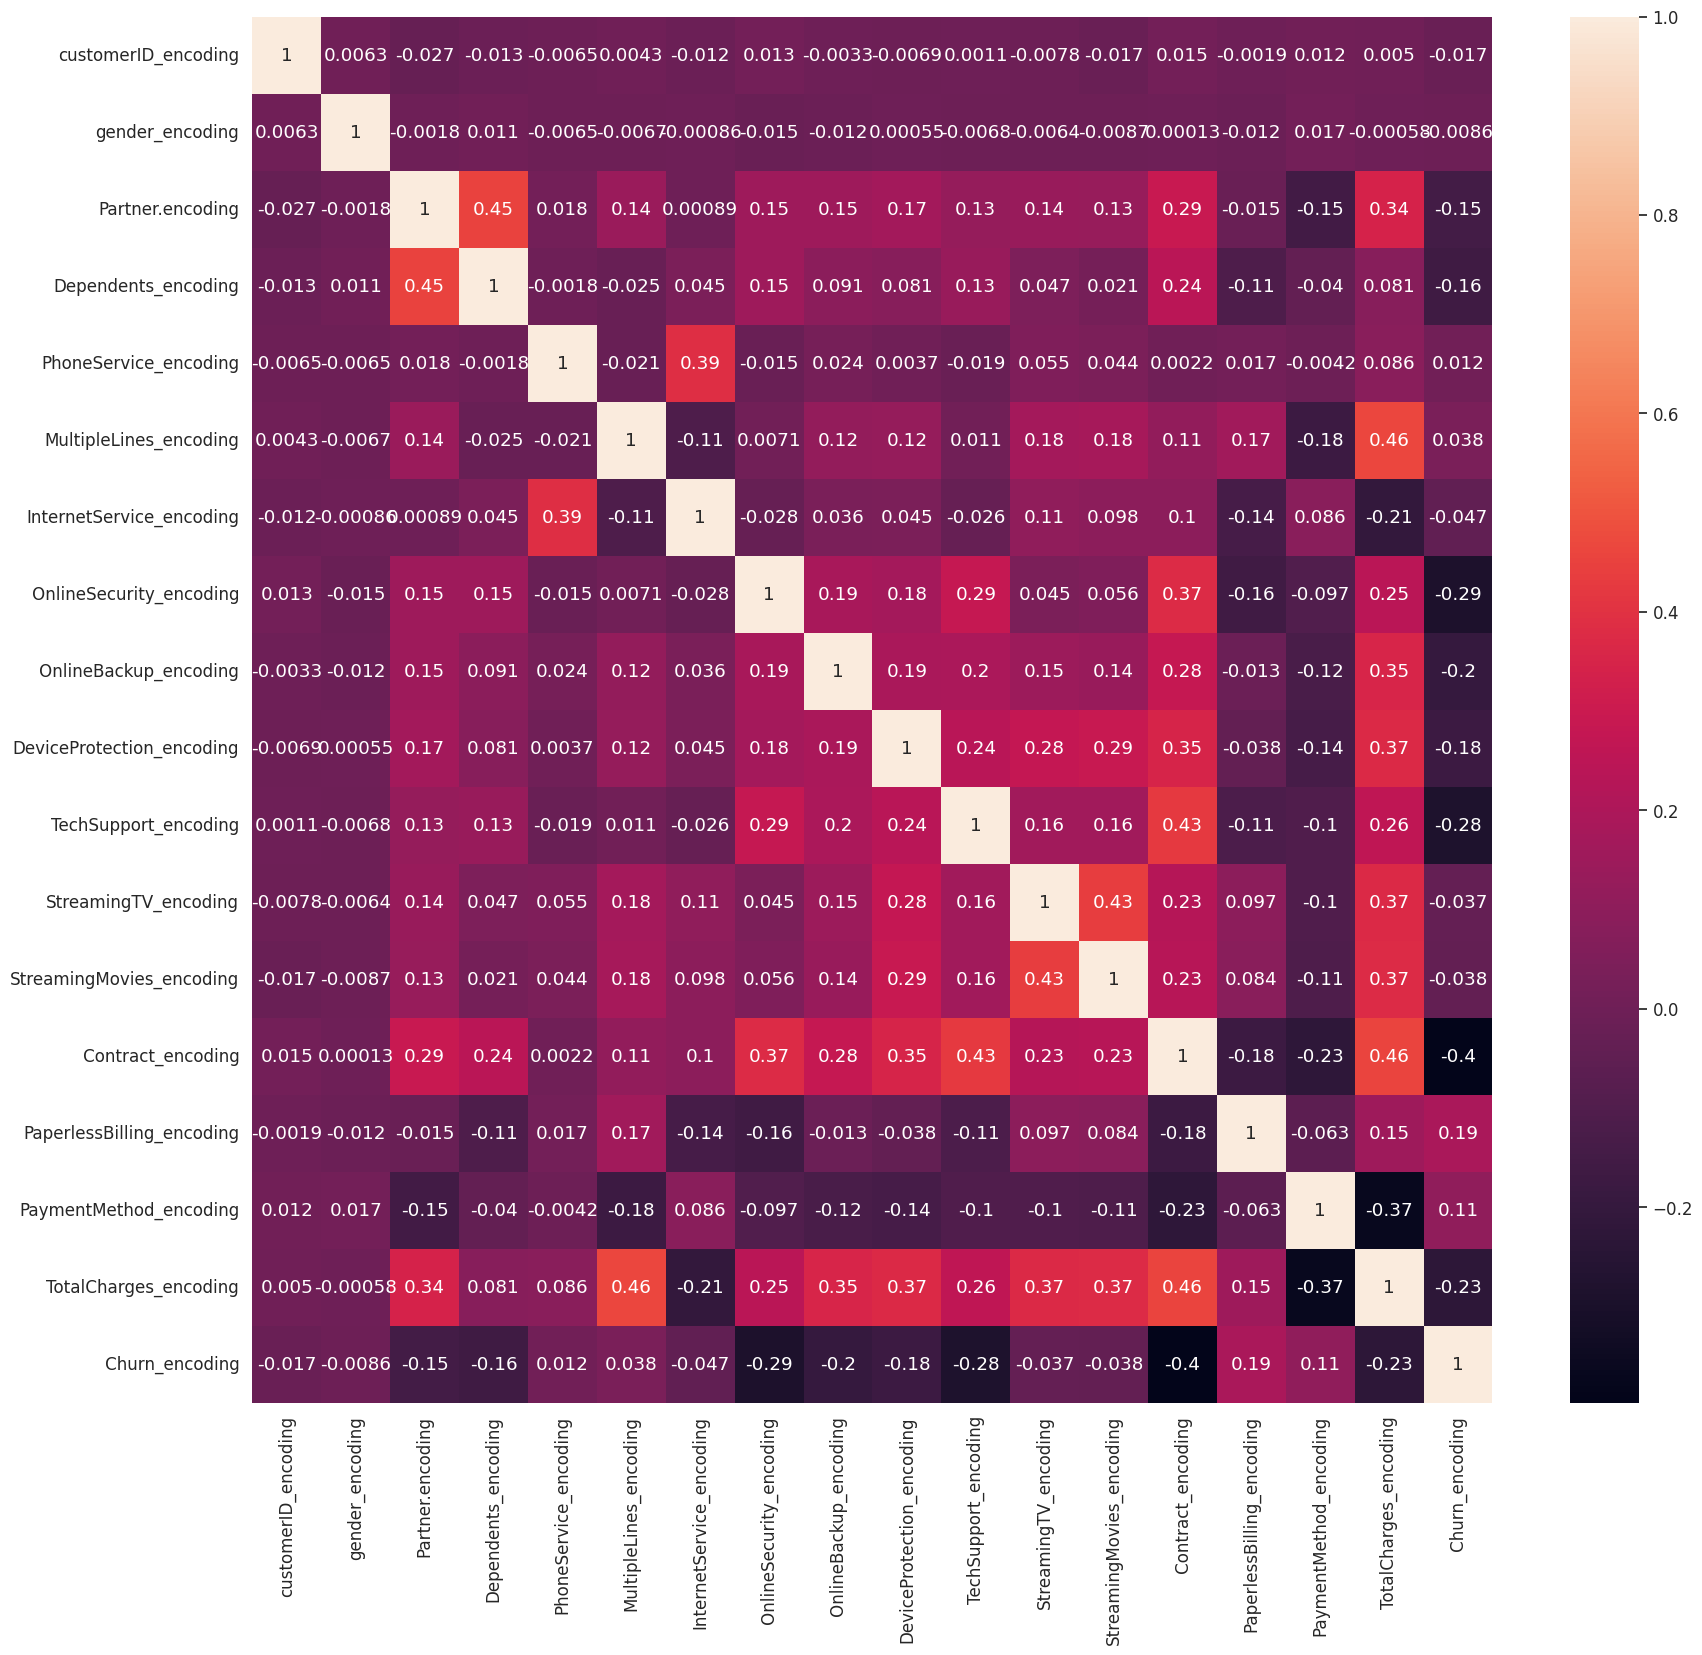

In [49]:
plt.figure(figsize=(20,18))
sns.heatmap(pf.corr(),annot=True)